In [114]:
import pyreadr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use("ggplot")
import time


In [115]:
result = pyreadr.read_r("data/point_by_point.RData")

I have looked at the atp_elo, atp_importance, atp_odds, and atp_rankings datasets

In [116]:
print(result.keys())

odict_keys(['point_by_point'])


In [117]:
df= result['point_by_point']
df.columns

Index(['date', 'tny_name', 'tour', 'draw', 'server1', 'server2', 'winner',
       'score', 'adf_flag', 'tny_date', 'W1', 'W2', 'W3', 'W4', 'W5', 'L1',
       'L2', 'L3', 'L4', 'L5', 'WTB1', 'LTB1', 'WTB2', 'LTB2', 'WTB3', 'LTB3',
       'WTB4', 'LTB4', 'WTB5', 'LTB5', 'Set1', 'Set2', 'Set3', 'Set4', 'Set5',
       'TB1', 'TB2', 'TB3', 'TB4', 'TB5'],
      dtype='object')

In [118]:
len(df)
#men's atp tour data goes to row 74,000
score = df.score[0].split()
score_lst =[]
for i,element in enumerate(score):
    score_lst.append(element.split("-"))
score_lst
    

[['6', '4'], ['6', '1']]

In [119]:
df.head(5)

,date,tny_name,tour,draw,server1,server2,winner,score,adf_flag,tny_date,...,Set1,Set2,Set3,Set4,Set5,TB1,TB2,TB3,TB4,TB5
0,28 Jul 11,ATPStudenaCroatiaOpen-ATPUmag2011,ATP,Main,Olivier Rochus,Fabio Fognini,2,6-4 6-1,0,15183.0,...,SSSS;RRRR;SSRRSS;SSRRSS;RSRSRSRR;SSRSS;RSRRSR;...,SRRRSSRR;SRSRRR;RSSRRR;RRRSSSRSSRSS;RSSRRSRR;S...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,28 Jul 11,ATPStudenaCroatiaOpen-ATPUmag2011,ATP,Main,Robin Haase,Marin Cilic,2,4-6 6-4 6-3,0,15183.0,...,SSRSS;RRSSRSSS;SSSS;RSSSS;SRSRSS;RSRSRSSS;RSRS...,RSSRSRSRSRRR;RSSSS;SSRSS;SRRRSSSRSS;SRSRSRSS;S...,RRSSRR;SRSRRR;RRRR;SSRSRRRSSRSS;SRSRRSSS;SRRRS...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,29 Jul 11,ATPStudenaCroatiaOpen-ATPUmag2011,ATP,Main,Marin Cilic,Andreas Seppi,1,6-1 6-3,0,15184.0,...,SSSS;SRRRR;SSRRRSSS;RSRRSSSS;RSRSSS;SRRRR;SSRSS,RSRSRSSS;SSSS;SSSRRS;SSRRSS;RRSSRSRSRR;SRSSS;R...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,29 Jul 11,ATPStudenaCroatiaOpen-ATPUmag2011,ATP,Main,Alexandr Dolgopolov,Albert Ramos,1,6-3 7-5,0,15184.0,...,SRSSRS;RRSSSRSS;RSRSSRSRSS;RRRR;SSRSS;SRSSS;SR...,SSSS;SRSSS;SSRRRSSRSRRSSS;SSSS;RSRSRR;SSSS;RSR...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,29 Jul 11,ATPStudenaCroatiaOpen-ATPUmag2011,ATP,Main,Carlos Berlocq,Juan Carlos Ferrero,2,6-1 7-6(5),0,15184.0,...,RRRR;SRSSS;SSRRSS;RSRSSS;RRRSR;SSSRRS;RRRR,SRRSSS;RRRR;RSRRSR;RSSSRRRR;SSSS;RRRSSR;RRRR;R...,NaN,NaN,NaN,NaN,R/RR/RS/RS/RS/SR/S,NaN,NaN,NaN


In [120]:
df_new = df[(df["server1"]=="Fabio Fognini") | (df["server2"]=="Fabio Fognini")]
df_new


,date,tny_name,tour,draw,server1,server2,winner,score,adf_flag,tny_date,...,Set1,Set2,Set3,Set4,Set5,TB1,TB2,TB3,TB4,TB5
0,28 Jul 11,ATPStudenaCroatiaOpen-ATPUmag2011,ATP,Main,Olivier Rochus,Fabio Fognini,2,6-4 6-1,0,15183.0,...,SSSS;RRRR;SSRRSS;SSRRSS;RSRSRSRR;SSRSS;RSRRSR;...,SRRRSSRR;SRSRRR;RSSRRR;RRRSSSRSSRSS;RSSRRSRR;S...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,30 Jul 11,ATPStudenaCroatiaOpen-ATPUmag2011,ATP,Main,Marin Cilic,Fabio Fognini,1,6-2 6-2,0,15185.0,...,SSSS;RSSSS;RSSRSS;SSSRRRSRSRRR;SSRRSRRSSS;SRSR...,RSRSRR;SRSSRS;SSSRS;RRSRR;SRSRRSSS;RSSRRR;SRSS...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,09 Aug 11,RogersCup-ATPMontreal2011,ATP,Main,Jo-Wilfried Tsonga,Fabio Fognini,1,6-4 7-6(0),0,15195.0,...,SRSSS;SRSRRR;RSSSS;SSRSRS;SSSS;RSSRSRSS;SRRSSS...,RRRSR;SRSRSS;SRSSS;SSSS;SSRRSS;RRSSSS;RSRSSS;R...,NaN,NaN,NaN,NaN,S/RR/SS/RR,NaN,NaN,NaN
95,09 Aug 11,RogersCup-ATPMontreal2011.html,ATP,Main,Jo-Wilfried Tsonga,Fabio Fognini,1,6-4 7-6(0),0,15195.0,...,SRSSS;SRSRRR;RSSSS;SSRSRS;SSSS;RSSRSRSS;SRRSSS...,RRRSR;SRSRSS;SRSSS;SSSS;SSRRSS;RRSSSS;RSRSSS;R...,NaN,NaN,NaN,NaN,S/RR/SS/RR,NaN,NaN,NaN
104,15 Aug 11,Western&amp;SouthernOpen-ATPCincinnati2011,ATP,Main,Fabio Fognini,Viktor Troicki,1,6-4 6-1,0,15201.0,...,SRSRSS;SSSS;RSSRSS;SRRSSRSRSS;SSRSRS;RRSRSSSRR...,SSSS;RSRSSRRSRSRSSRRR;SRRSSS;SSRRSRRR;SSRRSS;S...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,17 Aug 11,Western&amp;SouthernOpen-ATPCincinnati2011,ATP,Main,Fabio Fognini,James Blake,2,6-4 6-2,0,15203.0,...,SRRSRR;RSRSSRSS;SRSRSRSS;SSRSS;SRSSS;RRSSRSSS;...,RRRR;SSSS;RSRRR;SSSS;SSSRRRSS;SSSRS;SSRRRSSRSS...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307,04 Oct 11,ChinaOpen-ATPBeijing2012,ATP,Main,Grega Zemlja,Fabio Fognini,2,6-4 6-1,0,15251.0,...,RRSSSS;RSSRSS;SRSSS;SSSRRS;SSRRRSRR;SSSS;SSSS;...,RRSRR;RSRSSS;RSRSRSRSRR;RSSSRS;RRSSSRSS;RSRSSR...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
318,06 Oct 11,ChinaOpen-ATPBeijing2012,ATP,Main,Marin Cilic,Fabio Fognini,1,6-2 6-7(1) 6-3,0,15253.0,...,SSSS;RSRRSR;RRRR;RRSSSS;SSSS;RRSRSSRR;RRSSSRSS...,SRSRSS;RSSRRR;SRSSS;RSSRSS;SSSS;RRSSSRSS;RSRSR...,SRSSS;SSSS;RRRSR;SSRSS;SRRSSRSS;SSSS;RRRR;RRRR...,NaN,NaN,NaN,R/SS/RR/SR/R,NaN,NaN,NaN
349,26 Sep 11,PTTThailandOpen-ATPBangkok2011,ATP,Main,Fabio Fognini,Danai Udomchoke,2,6-4 3-6 6-2,0,15243.0,...,SSSRRS;SSSS;RRSSSS;SSSS;SSSRRS;RRSSSS;SSSS;RSS...,SSSS;SRSRSRRSSS;RSRSRR;RRSRSR;RSSRRSSS;SRRRSR;...,SSSRS;SRSSS;SSSRRS;RRRR;SSSS;SSRRSRSRSRSRRSRR;...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
447,09 Oct 11,ShanghaiRolexMasters-ATPShanghai2011,ATP,Main,Fabio Fognini,Florian Mayer,2,6-0 6-2,0,15256.0,...,RRRR;SSSS;SRRSRR;SRSSRS;RRRR;SRSSS,SSRRRSSS;SSSS;SRRSSRRR;RSRSSRSS;SRSSS;SSSS;RRS...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
#given a list of strings for the server in a set which they won
#determine the win pt percentage by point for service games in the set

def point_by_sgame_perc(lst_of_str):
    lst_of_pt_perc = []
    l=[len(element) for i,element in enumerate(lst_of_str)]
    l_idx = min(max(l),12)
    for i in range(l_idx):
        count, total = 0,0
        for j in range(len(lst_of_str)):
            if len(lst_of_str[j])-1 >= i:
                if lst_of_str[j][i]=="S":
                    count += 1
                    total += 1
                else:
                    total += 1
            else:
                pass
        lst_of_pt_perc.append(count/total)
    return lst_of_pt_perc

In [122]:
#given a list of strings for the returner in a set which they won
#determine the win pt percentage by point within return games in a set

def point_by_rgame_perc(lst_of_str):
    lst_of_pt_perc = []
    l=[len(element) for i,element in enumerate(lst_of_str)]
    l_idx = min(max(l),12)
    for i in range(l_idx):
        count, total = 0,0
        for j in range(len(lst_of_str)):
            if len(lst_of_str[j])-1 >= i:
                if lst_of_str[j][i]=="R":
                    count += 1
                    total += 1
                else:
                    total += 1
            else:
                pass
        lst_of_pt_perc.append(count/total)
    return lst_of_pt_perc

In [123]:
#must figure out if player one or two won the set
#and then filter out their service games which they played in the winning set
def get_lst_of_strings_to_decode(x):
    pt_hist_lst_games = x.split(";")
#    if df["winner"].item() == 2:
#        lst_of_strings = pt_hist_lst_games[1::2]
#    else:
#        lst_of_strings = pt_hist_lst_games[0::2]
    return pt_hist_lst_games

In [124]:
df[0:0+1]["winner"] == 2

0    True
Name: winner, dtype: bool

In [125]:
df_exam = df_new[0:10]
df_exam.head()

,date,tny_name,tour,draw,server1,server2,winner,score,adf_flag,tny_date,...,Set1,Set2,Set3,Set4,Set5,TB1,TB2,TB3,TB4,TB5
0,28 Jul 11,ATPStudenaCroatiaOpen-ATPUmag2011,ATP,Main,Olivier Rochus,Fabio Fognini,2,6-4 6-1,0,15183.0,...,SSSS;RRRR;SSRRSS;SSRRSS;RSRSRSRR;SSRSS;RSRRSR;...,SRRRSSRR;SRSRRR;RSSRRR;RRRSSSRSSRSS;RSSRRSRR;S...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,30 Jul 11,ATPStudenaCroatiaOpen-ATPUmag2011,ATP,Main,Marin Cilic,Fabio Fognini,1,6-2 6-2,0,15185.0,...,SSSS;RSSSS;RSSRSS;SSSRRRSRSRRR;SSRRSRRSSS;SRSR...,RSRSRR;SRSSRS;SSSRS;RRSRR;SRSRRSSS;RSSRRR;SRSS...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,09 Aug 11,RogersCup-ATPMontreal2011,ATP,Main,Jo-Wilfried Tsonga,Fabio Fognini,1,6-4 7-6(0),0,15195.0,...,SRSSS;SRSRRR;RSSSS;SSRSRS;SSSS;RSSRSRSS;SRRSSS...,RRRSR;SRSRSS;SRSSS;SSSS;SSRRSS;RRSSSS;RSRSSS;R...,NaN,NaN,NaN,NaN,S/RR/SS/RR,NaN,NaN,NaN
95,09 Aug 11,RogersCup-ATPMontreal2011.html,ATP,Main,Jo-Wilfried Tsonga,Fabio Fognini,1,6-4 7-6(0),0,15195.0,...,SRSSS;SRSRRR;RSSSS;SSRSRS;SSSS;RSSRSRSS;SRRSSS...,RRRSR;SRSRSS;SRSSS;SSSS;SSRRSS;RRSSSS;RSRSSS;R...,NaN,NaN,NaN,NaN,S/RR/SS/RR,NaN,NaN,NaN
104,15 Aug 11,Western&amp;SouthernOpen-ATPCincinnati2011,ATP,Main,Fabio Fognini,Viktor Troicki,1,6-4 6-1,0,15201.0,...,SRSRSS;SSSS;RSSRSS;SRRSSRSRSS;SSRSRS;RRSRSSSRR...,SSSS;RSRSSRRSRSRSSRRR;SRRSSS;SSRRSRRR;SSRRSS;S...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
df_exam["pt_perc"]=df_exam["Set1"].apply(lambda x: get_lst_of_strings_to_decode(x))
df_exam["pt_perc_num"]= df_exam["pt_perc"].apply(lambda x: point_by_sgame_perc(x))
df_exam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 447
Data columns (total 42 columns):
date           10 non-null object
tny_name       10 non-null object
tour           10 non-null object
draw           10 non-null object
server1        10 non-null object
server2        10 non-null object
winner         10 non-null int32
score          10 non-null object
adf_flag       10 non-null int32
tny_date       10 non-null float64
W1             10 non-null object
W2             10 non-null object
W3             2 non-null object
W4             0 non-null object
W5             0 non-null object
L1             10 non-null object
L2             10 non-null object
L3             2 non-null object
L4             0 non-null object
L5             0 non-null object
WTB1           0 non-null float64
LTB1           0 non-null float64
WTB2           3 non-null float64
LTB2           3 non-null float64
WTB3           0 non-null float64
LTB3           0 non-null float64
WTB4           0 no

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


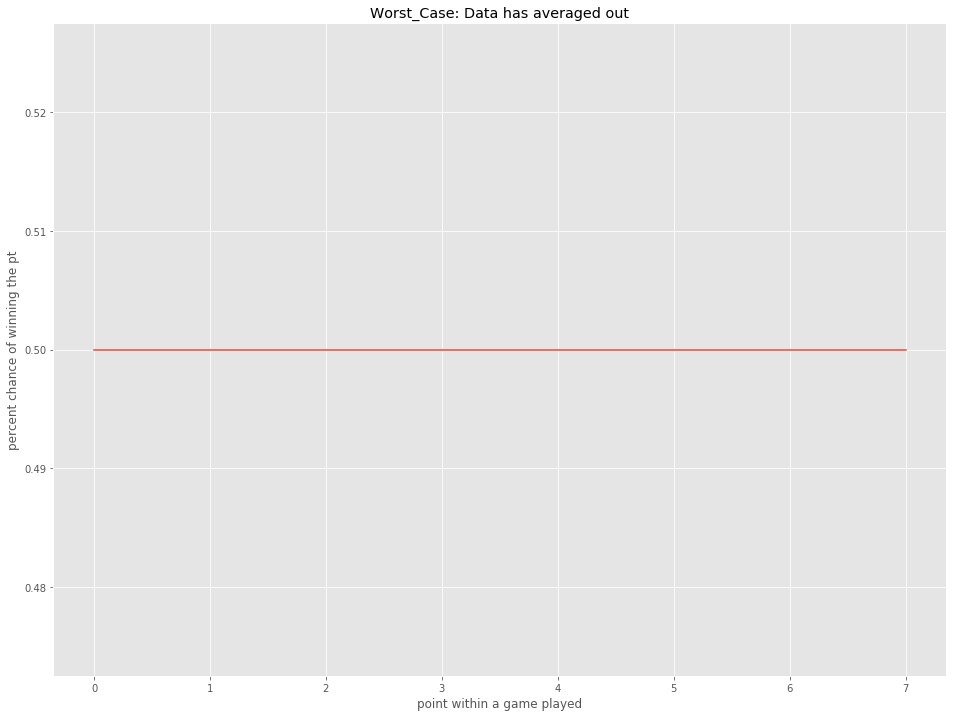

In [185]:
fig, ax = plt.subplots(1,1, figsize=(16,12))
ax.plot(range(8),[.5,.5,.5,.5,.5,.5,.5,.5])
ax.set_title("Worst_Case: Data has averaged out")
ax.set_xlabel("point within a game played")
ax.set_ylabel("percent chance of winning the pt")
plt.savefig("images/WorstCase")
plt.show()

In [128]:
columns =["Pt1","Pt2","Pt3","Pt4","Pt5","Pt6","Pt7","Pt8","Pt9","Pt10","Pt11","Pt12"]#,"Pt13","Pt14"]
df3=pd.DataFrame(df_exam.pt_perc_num.tolist(),columns=columns)
df3


,Pt1,Pt2,Pt3,Pt4,Pt5,Pt6,Pt7,Pt8,Pt9,Pt10,Pt11,Pt12
0,0.600000,0.900000,0.100,0.600000,0.750000,0.666667,0.000000,0.500000,1.000000,1.000000,NaN,NaN
1,0.625000,0.875000,0.625,0.250000,0.714286,0.400000,0.333333,0.666667,0.666667,0.666667,0.0,0.5
2,0.600000,0.500000,0.600,0.600000,0.750000,0.600000,1.000000,0.500000,0.000000,0.000000,NaN,NaN
3,0.600000,0.500000,0.600,0.600000,0.750000,0.600000,1.000000,0.500000,0.000000,0.000000,NaN,NaN
4,0.700000,0.400000,0.600,0.400000,0.500000,0.750000,0.666667,0.333333,0.333333,0.666667,1.0,1.0
5,0.700000,0.500000,0.600,0.800000,0.666667,0.333333,1.000000,1.000000,NaN,NaN,NaN,NaN
6,0.700000,0.600000,0.900,0.600000,0.750000,0.800000,0.500000,0.500000,NaN,NaN,NaN,NaN
7,0.250000,0.375000,0.750,0.625000,0.800000,0.600000,0.333333,0.333333,NaN,NaN,NaN,NaN
8,0.700000,0.700000,0.800,0.800000,0.571429,0.666667,0.500000,1.000000,0.000000,0.000000,NaN,NaN
9,0.666667,0.166667,0.500,0.666667,0.333333,0.500000,NaN,NaN,NaN,NaN,NaN,NaN


In [129]:
df3.mean()
df3.describe()

,Pt1,Pt2,Pt3,Pt4,Pt5,Pt6,Pt7,Pt8,Pt9,Pt10,Pt11,Pt12
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,9.000000,6.000000,6.000000,2.000000,2.000000
mean,0.614167,0.551667,0.607500,0.594167,0.658571,0.591667,0.592593,0.592593,0.333333,0.388889,0.500000,0.750000
std,0.135631,0.226241,0.214103,0.165740,0.147244,0.145985,0.354643,0.251538,0.421637,0.443053,0.707107,0.353553
min,0.250000,0.166667,0.100000,0.250000,0.333333,0.333333,0.000000,0.333333,0.000000,0.000000,0.000000,0.500000
25%,0.600000,0.425000,0.600000,0.600000,0.595238,0.525000,0.333333,0.500000,0.000000,0.000000,0.250000,0.625000
50%,0.645833,0.500000,0.600000,0.600000,0.732143,0.600000,0.500000,0.500000,0.166667,0.333333,0.500000,0.750000
75%,0.700000,0.675000,0.718750,0.656250,0.750000,0.666667,1.000000,0.666667,0.583333,0.666667,0.750000,0.875000
max,0.700000,0.900000,0.900000,0.800000,0.800000,0.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [130]:
df_4= df_exam[df_exam["winner"]==1]
df_4

,date,tny_name,tour,draw,server1,server2,winner,score,adf_flag,tny_date,...,Set3,Set4,Set5,TB1,TB2,TB3,TB4,TB5,pt_perc,pt_perc_num
36,30 Jul 11,ATPStudenaCroatiaOpen-ATPUmag2011,ATP,Main,Marin Cilic,Fabio Fognini,1,6-2 6-2,0,15185.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[SSSS, RSSSS, RSSRSS, SSSRRRSRSRRR, SSRRSRRSSS...","[0.625, 0.875, 0.625, 0.25, 0.7142857142857143..."
83,09 Aug 11,RogersCup-ATPMontreal2011,ATP,Main,Jo-Wilfried Tsonga,Fabio Fognini,1,6-4 7-6(0),0,15195.0,...,NaN,NaN,NaN,NaN,S/RR/SS/RR,NaN,NaN,NaN,"[SRSSS, SRSRRR, RSSSS, SSRSRS, SSSS, RSSRSRSS,...","[0.6, 0.5, 0.6, 0.6, 0.75, 0.6, 1.0, 0.5, 0.0,..."
95,09 Aug 11,RogersCup-ATPMontreal2011.html,ATP,Main,Jo-Wilfried Tsonga,Fabio Fognini,1,6-4 7-6(0),0,15195.0,...,NaN,NaN,NaN,NaN,S/RR/SS/RR,NaN,NaN,NaN,"[SRSSS, SRSRRR, RSSSS, SSRSRS, SSSS, RSSRSRSS,...","[0.6, 0.5, 0.6, 0.6, 0.75, 0.6, 1.0, 0.5, 0.0,..."
104,15 Aug 11,Western&amp;SouthernOpen-ATPCincinnati2011,ATP,Main,Fabio Fognini,Viktor Troicki,1,6-4 6-1,0,15201.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[SRSRSS, SSSS, RSSRSS, SRRSSRSRSS, SSRSRS, RRS...","[0.7, 0.4, 0.6, 0.4, 0.5, 0.75, 0.666666666666..."
318,06 Oct 11,ChinaOpen-ATPBeijing2012,ATP,Main,Marin Cilic,Fabio Fognini,1,6-2 6-7(1) 6-3,0,15253.0,...,SRSSS;SSSS;RRRSR;SSRSS;SRRSSRSS;SSSS;RRRR;RRRR...,NaN,NaN,NaN,R/SS/RR/SR/R,NaN,NaN,NaN,"[SSSS, RSRRSR, RRRR, RRSSSS, SSSS, RRSRSSRR, R...","[0.25, 0.375, 0.75, 0.625, 0.8, 0.6, 0.3333333..."


In [131]:
df_4["pt_perc"]=df_4["Set1"].apply(lambda x: get_lst_of_strings_to_decode(x)[0::2])
df_4["pt_perc_num"]= df_4["pt_perc"].apply(lambda x: point_by_sgame_perc(x))
df_4

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,date,tny_name,tour,draw,server1,server2,winner,score,adf_flag,tny_date,...,Set3,Set4,Set5,TB1,TB2,TB3,TB4,TB5,pt_perc,pt_perc_num
36,30 Jul 11,ATPStudenaCroatiaOpen-ATPUmag2011,ATP,Main,Marin Cilic,Fabio Fognini,1,6-2 6-2,0,15185.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[SSSS, RSSRSS, SSRRSRRSSS, SSRRSS]","[0.75, 1.0, 0.5, 0.25, 1.0, 0.6666666666666666..."
83,09 Aug 11,RogersCup-ATPMontreal2011,ATP,Main,Jo-Wilfried Tsonga,Fabio Fognini,1,6-4 7-6(0),0,15195.0,...,NaN,NaN,NaN,NaN,S/RR/SS/RR,NaN,NaN,NaN,"[SRSSS, RSSSS, SSSS, SRRSSS, RRRR]","[0.6, 0.4, 0.6, 0.8, 1.0, 1.0]"
95,09 Aug 11,RogersCup-ATPMontreal2011.html,ATP,Main,Jo-Wilfried Tsonga,Fabio Fognini,1,6-4 7-6(0),0,15195.0,...,NaN,NaN,NaN,NaN,S/RR/SS/RR,NaN,NaN,NaN,"[SRSSS, RSSSS, SSSS, SRRSSS, RRRR]","[0.6, 0.4, 0.6, 0.8, 1.0, 1.0]"
104,15 Aug 11,Western&amp;SouthernOpen-ATPCincinnati2011,ATP,Main,Fabio Fognini,Viktor Troicki,1,6-4 6-1,0,15201.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[SRSRSS, RSSRSS, SSRSRS, SSRRRR, SRSRRSRSRSSS]","[0.8, 0.6, 0.6, 0.2, 0.4, 0.8, 0.0, 1.0, 0.0, ..."
318,06 Oct 11,ChinaOpen-ATPBeijing2012,ATP,Main,Marin Cilic,Fabio Fognini,1,6-2 6-7(1) 6-3,0,15253.0,...,SRSSS;SSSS;RRRSR;SSRSS;SRRSSRSS;SSSS;RRRR;RRRR...,NaN,NaN,NaN,R/SS/RR/SR/R,NaN,NaN,NaN,"[SSSS, RRRR, SSSS, RRSSSRSS]","[0.5, 0.5, 0.75, 0.75, 1.0, 0.0, 1.0, 1.0]"


In [132]:
df_4.pt_perc[0:1]

36    [SSSS, RSSRSS, SSRRSRRSSS, SSRRSS]
Name: pt_perc, dtype: object

In [133]:
df_4.Set1

36     SSSS;RSSSS;RSSRSS;SSSRRRSRSRRR;SSRRSRRSSS;SRSR...
83     SRSSS;SRSRRR;RSSSS;SSRSRS;SSSS;RSSRSRSS;SRRSSS...
95     SRSSS;SRSRRR;RSSSS;SSRSRS;SSSS;RSSRSRSS;SRRSSS...
104    SRSRSS;SSSS;RSSRSS;SRRSSRSRSS;SSRSRS;RRSRSSSRR...
318    SSSS;RSRRSR;RRRR;RRSSSS;SSSS;RRSRSSRR;RRSSSRSS...
Name: Set1, dtype: object

In [134]:
#let's get 100 matches where player 1 was the match winner and look at just their service games.
#let's map our two functions and make a new df with pt percentages.  Next, let's aggregate and get the means, then 
#make a plot
df_try = df[df["winner"]==1].head(2500)
df_try["pt_perc"]=df_try["Set1"].apply(lambda x: get_lst_of_strings_to_decode(x)[0::2])
df_try["pt_perc_num"]= df_try["pt_perc"].apply(lambda x: point_by_sgame_perc(x))
#df_try.head()
columns =["Pt1","Pt2","Pt3","Pt4","Pt5","Pt6","Pt7","Pt8","Pt9","Pt10","Pt11","Pt12"] #,"Pt13","Pt14","Pt15","Pt16","Pt17","Pt18","Pt19","Pt20"]
df_try_final=pd.DataFrame(df_try.pt_perc_num.tolist(),columns=columns)
df_try_final
y6=df_try_final.mean()[0:8]
y6

Pt1    0.662453
Pt2    0.651120
Pt3    0.653793
Pt4    0.643153
Pt5    0.652225
Pt6    0.655382
Pt7    0.650137
Pt8    0.671578
dtype: float64

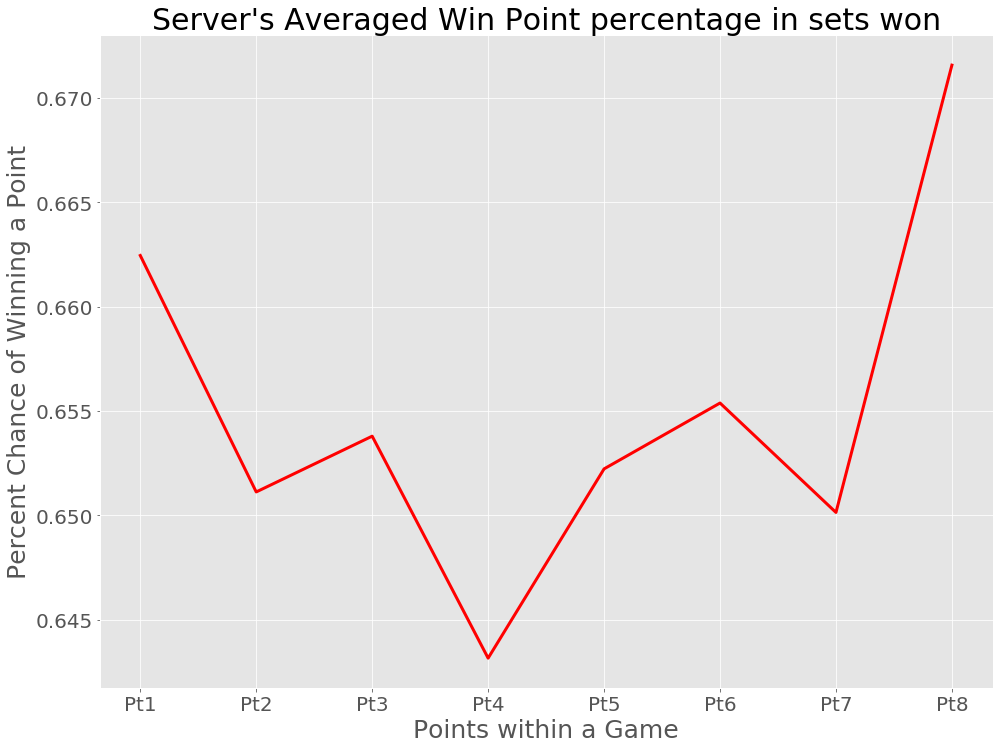

In [233]:
#fig = plt.figure(figsize=(20,16))
fig, ax = plt.subplots(1,1, figsize=(16,12))
#ax.plot(y1, c="r", label="100 sets")
#ax.plot(y4, c="b", label ="1,000 sets")
ax.plot(y6, c="r", linewidth=3.0, label = "2,500 sets")
ax.set_title("Server's Averaged Win Point percentage in sets won",fontsize=30)
ax.set_xlabel("Points within a Game", fontsize=25)
ax.set_ylabel("Percent Chance of Winning a Point",fontsize=25)
ax.tick_params(labelsize=20)
#ax.plot(y6)
#ax.plot(y5, c="c", label ="5,000 sets")
#ax.plot(y3, c="g", label = "10,000 sets")
#plt.title("Variation of pt win% on serve with sample size")
#plt.legend()
plt.savefig("images/ServeWinPtPerc.png")
plt.show()

In [188]:
#let's take a look at the winning players pt% in return games and plot
df_return = df[df["winner"]==1].head(2500)
df_return["pt_perc"]=df_return["Set1"].apply(lambda x: get_lst_of_strings_to_decode(x)[1::2])
df_return["pt_perc_num"]= df_return["pt_perc"].apply(lambda x: point_by_rgame_perc(x))
columns =["Pt1","Pt2","Pt3","Pt4","Pt5","Pt6","Pt7","Pt8","Pt9","Pt10","Pt11","Pt12"]#,"Pt13","Pt14","Pt15","Pt16","Pt17","Pt18"]
df_return_final=pd.DataFrame(df_return.pt_perc_num.tolist(),columns=columns)
df_return_final
df_return_final.count()
y=df_return_final.mean()[0:8]
y
y_avg = y.mean()
y_avg



0.4130233309456158

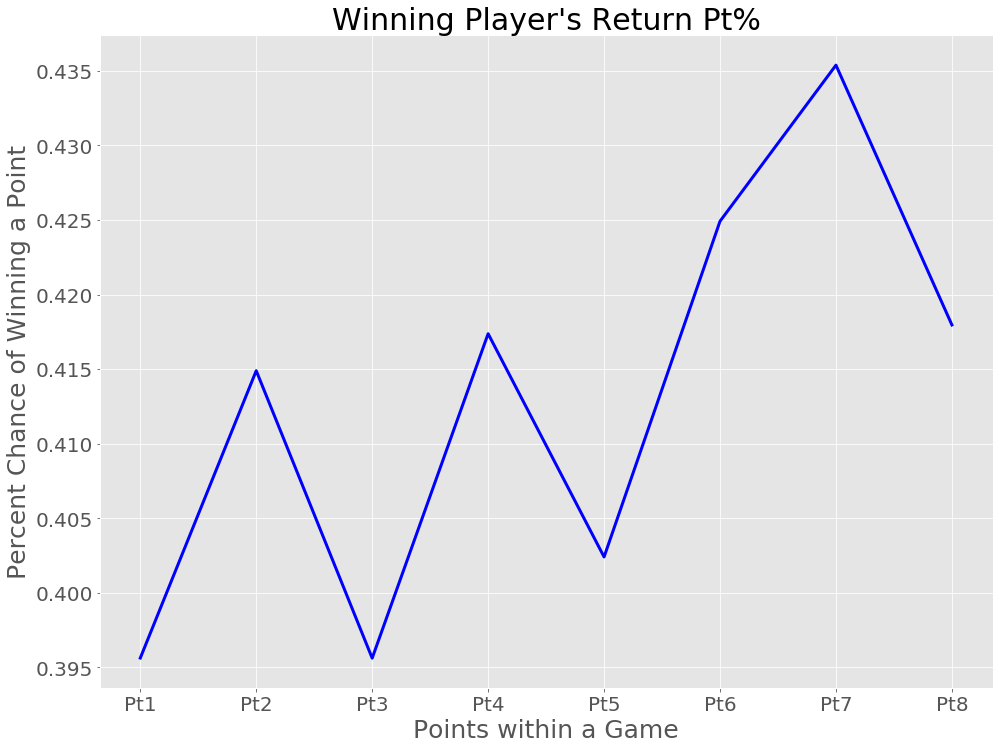

In [234]:
#fig = plt.figure(figsize=(20,16))
fig, ax = plt.subplots(1,1, figsize=(16,12))
ax.plot(y,c="b",linewidth=3.0)
#ax.axhline(y_avg, c="b")
plt.title("Winning Player's Return Pt%",fontsize=30)
ax.set_xlabel("Points within a Game",fontsize=25)
ax.set_ylabel("Percent Chance of Winning a Point",fontsize=25)
ax.tick_params(labelsize=20)
plt.savefig("images/ReturnWinPtPerc.png")
plt.show()

In [138]:
#given a list of strings for the set winner in which server one is the match winner
#determine the win pt percentage by game for all games in a set

def lst_of_games_won(lst_of_str):
    lst_of_gm_wins = []
    for i in range(len(lst_of_str)):
        if i%2==0:
            if lst_of_str[i][-1]=="S":
                lst_of_gm_wins.append(1)
            else:
                lst_of_gm_wins.append(0)
        else:
            if lst_of_str[i][-1]=="R":
                lst_of_gm_wins.append(1)
            else:
                lst_of_gm_wins.append(0)
    return lst_of_gm_wins

In [139]:
df[df["winner"]==1].head()

,date,tny_name,tour,draw,server1,server2,winner,score,adf_flag,tny_date,...,Set1,Set2,Set3,Set4,Set5,TB1,TB2,TB3,TB4,TB5
2,29 Jul 11,ATPStudenaCroatiaOpen-ATPUmag2011,ATP,Main,Marin Cilic,Andreas Seppi,1,6-1 6-3,0,15184.0,...,SSSS;SRRRR;SSRRRSSS;RSRRSSSS;RSRSSS;SRRRR;SSRSS,RSRSRSSS;SSSS;SSSRRS;SSRRSS;RRSSRSRSRR;SRSSS;R...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,29 Jul 11,ATPStudenaCroatiaOpen-ATPUmag2011,ATP,Main,Alexandr Dolgopolov,Albert Ramos,1,6-3 7-5,0,15184.0,...,SRSSRS;RRSSSRSS;RSRSSRSRSS;RRRR;SSRSS;SRSSS;SR...,SSSS;SRSSS;SSRRRSSRSRRSSS;SSSS;RSRSRR;SSSS;RSR...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,28 Jul 11,CreditAgricoleSuisseOpenGstaad-ATPGstaad2011,ATP,Main,Stanislas Wawrinka,Peter Luczak,1,6-3 7-5,0,15183.0,...,SSSS;RRSSSS;SRSSRS;RRSSSS;SSSRS;SSSRRS;RSSSS;R...,SSRSS;SSRRSS;RSRSSS;RSSRRR;SSRRSRSS;SSRRRSSS;R...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,29 Jul 11,CreditAgricoleSuisseOpenGstaad-ATPGstaad2011,ATP,Main,Nicolas Almagro,Feliciano Lopez,1,6-4 7-5,0,15184.0,...,SSSRS;SSSRRRRSRSSS;SSRRRSSRRSSRSS;SSSS;SSSS;SR...,SSSS;SSSS;SSSS;RSSSS;SSSS;SSSRRS;RSSSS;RSSSS;S...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,28 Jul 11,FarmersClassic-ATPLosAngeles2011,ATP,Main,Alex Bogomolov Jr,Grigor Dimitrov,1,6-4 6-3,0,15183.0,...,SSRRSS;RSSSS;SSRSS;RRSSSRSS;SSRSS;SSSS;SRSSRS;...,SSRSRS;RSSRRSSRRR;SSSRS;SRRRSSSS;SSRRRSSS;SRSS...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
df_game_pct = df[df["winner"]==1].head(2500)
df_game_pct["lst_of_game_strings"]=df_game_pct["Set1"].apply(lambda x: get_lst_of_strings_to_decode(x))
df_game_pct["lst_games_won"]= df_game_pct["lst_of_game_strings"].apply(lambda x: lst_of_games_won(x))
columns =["Gm1","Gm2","Gm3","Gm4","Gm5","Gm6","Gm7","Gm8","Gm9","Gm10","Gm11","Gm12"]
df_game_pct_final=pd.DataFrame(df_game_pct.lst_games_won.tolist(),columns=columns)
df_game_pct_final
games=df_game_pct_final.sum()/df_game_pct_final.count()
s_games = games[::2]
r_games = games[1::2]
r_games

#y=df_game_pct_final.mean()[0:12]




Gm2     0.297200
Gm4     0.308000
Gm6     0.314400
Gm8     0.281870
Gm10    0.297095
Gm12    0.294753
dtype: float64

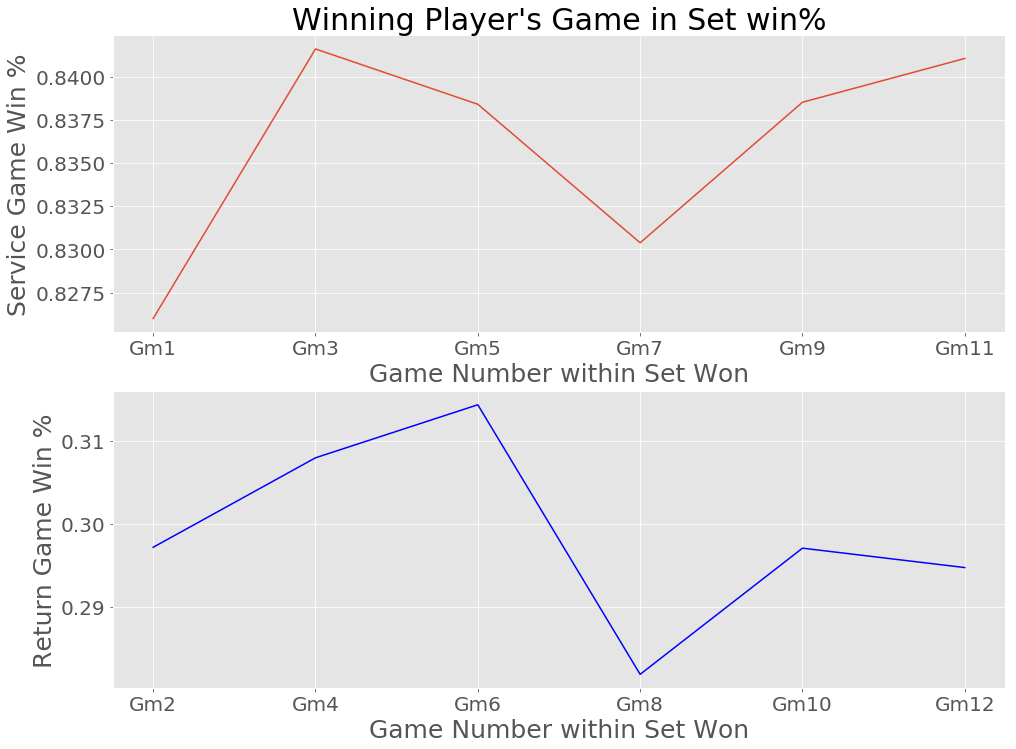

In [238]:
#fig = plt.figure(figsize=(20,16))
fig, ax = plt.subplots(2,1, figsize =(16,12))
x1 = ["Gm1","Gm3","Gm5","Gm7","Gm9","Gm11"]
ax[0].plot(x1,s_games)
x2 = ["Gm2","Gm4","Gm6","Gm8","Gm10","Gm12"]
ax[1].plot(x2,r_games,c="b")
ax[0].set_xlabel("Game Number within Set Won",fontsize =25)
ax[0].set_ylabel("Service Game Win %",fontsize=25)
ax[1].set_xlabel("Game Number within Set Won",fontsize=25)
ax[1].set_ylabel("Return Game Win %",fontsize=25)
ax[0].set_title("Winning Player's Game in Set win%",fontsize =30)
ax[0].tick_params(labelsize =20)
ax[1].tick_params(labelsize=20)
plt.savefig("images/WinGameSetPerc.png")
plt.show()

In [197]:
#How big of a dataframe can I analyze on my current machine and how long will it take
df_size = df[df["winner"]==1].head(100)
df_size["pt_perc"]=df_size["Set1"].apply(lambda x: get_lst_of_strings_to_decode(x)[0::2])
df_size["pt_perc_num"]= df_size["pt_perc"].apply(lambda x: point_by_sgame_perc(x))
columns =["Pt1","Pt2","Pt3","Pt4","Pt5","Pt6","Pt7","Pt8","Pt9","Pt10","Pt11","Pt12"]#,"Pt13","Pt14","Pt15","Pt16","Pt17","Pt18","Pt19","Pt20","Pt21","Pt22","Pt23","Pt24","Pt25","Pt26","Pt27","Pt28","Pt29","Pt30","Pt31","Pt32"]
df_size_final=pd.DataFrame(df_size.pt_perc_num.tolist(),columns=columns)
df_size_final
df_size_final.count()
y1=df_size_final.mean()[0:8]

In [143]:
df_try.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 2 to 4831
Data columns (total 42 columns):
date           2500 non-null object
tny_name       2500 non-null object
tour           2500 non-null object
draw           2500 non-null object
server1        2500 non-null object
server2        2500 non-null object
winner         2500 non-null int32
score          2500 non-null object
adf_flag       2500 non-null int32
tny_date       2500 non-null float64
W1             2500 non-null object
W2             2500 non-null object
W3             1106 non-null object
W4             187 non-null object
W5             66 non-null object
L1             2500 non-null object
L2             2500 non-null object
L3             1106 non-null object
L4             187 non-null object
L5             66 non-null object
WTB1           432 non-null float64
LTB1           432 non-null float64
WTB2           400 non-null float64
LTB2           400 non-null float64
WTB3           154 non-null float64


In [144]:
df_try_final

,Pt1,Pt2,Pt3,Pt4,Pt5,Pt6,Pt7,Pt8,Pt9,Pt10,Pt11,Pt12
0,0.750000,1.000000,0.250000,0.750000,0.666667,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN
1,0.800000,0.600000,0.400000,0.800000,0.600000,0.500000,0.500000,0.500000,1.000000,0.5,1.0,1.0
2,0.800000,0.800000,1.000000,0.800000,0.666667,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
3,1.000000,0.800000,0.800000,0.400000,0.333333,1.000000,1.000000,0.500000,0.000000,1.0,1.0,0.0
4,0.800000,0.800000,0.200000,0.600000,0.600000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
5,0.666667,0.333333,0.666667,0.833333,0.800000,0.500000,1.000000,0.000000,1.000000,0.0,1.0,1.0
6,0.666667,0.666667,0.666667,0.500000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.833333,0.500000,0.833333,0.166667,0.800000,0.500000,1.000000,0.000000,0.500000,0.5,1.0,1.0
8,0.666667,1.000000,0.666667,0.666667,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN
9,0.800000,1.000000,0.600000,0.600000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN


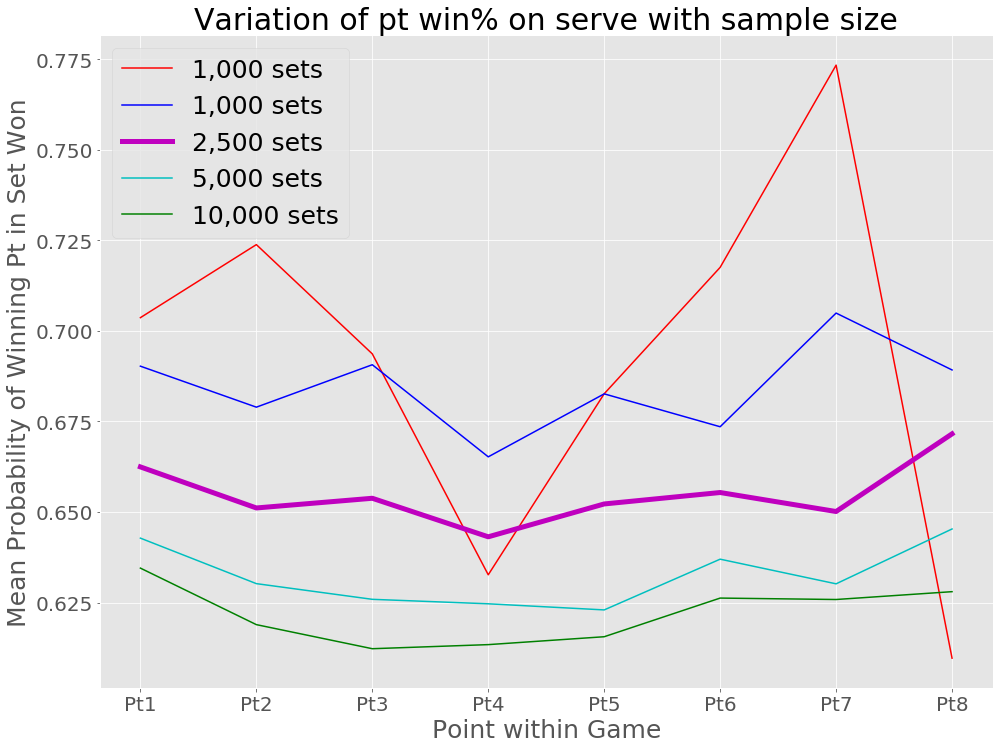

In [243]:
#fig = plt.figure(figsize=(12,8))
fig, ax = plt.subplots(1,1,figsize=(16,12))
#ax.hist(df_try_final.Pt1, bins=20, alpha =0.5, label="SPt1")
#ax.hist(df_try_final.Pt2, bins=20, alpha =0.5, label="SPt2")
#ax.hist(df_try_final.Pt3, bins=20, alpha =0.5, label="SPt3")
ax.plot(y1, c="r", label ="1,000 sets")
ax.plot(y4, c="b", label ="1,000 sets")
ax.plot(y6, c="m", linewidth=5.0,label = "2,500 sets")
ax.plot(y5, c="c", label ="5,000 sets")
ax.plot(y3, c="g", label = "10,000 sets")
ax.set_xlabel("Point within Game",fontsize=25)
ax.set_ylabel("Mean Probability of Winning Pt in Set Won", fontsize=25)
plt.title("Variation of pt win% on serve with sample size",fontsize=30)
ax.tick_params(labelsize=20)
plt.legend(prop={'size':25})
plt.savefig("images/SampleSize.png")
plt.show()


Histogram by Pt on serve is not very interesting.  I was hoping for a norman distribution

Is there a size limit on a jupyter notebook before it breaks down?

In [146]:
df_wed=df[df["winner"]==1].head(2500)

In [147]:
df_win_serve = df[df["winner"]==1].head(2500)
df_win_serve["pt_perc"]=df_win_serve["Set1"].apply(lambda x: get_lst_of_strings_to_decode(x)[0::2])
df_win_serve["pt_perc_num"]= df_win_serve["pt_perc"].apply(lambda x: point_by_sgame_perc(x))
#df_try.head()
columns =["Pt1","Pt2","Pt3","Pt4","Pt5","Pt6","Pt7","Pt8","Pt9","Pt10","Pt11","Pt12"] #,"Pt13","Pt14","Pt15","Pt16","Pt17","Pt18","Pt19","Pt20"]
df_win_serve_final=pd.DataFrame(df_win_serve.pt_perc_num.tolist(),columns=columns)
df_win_serve_final
s_win=df_win_serve_final.mean()[0:8]
s_win
df_win_return = df[df["winner"]==1].head(2500)
df_win_return["pt_perc"]=df_win_return["Set1"].apply(lambda x: get_lst_of_strings_to_decode(x)[1::2])
df_win_return["pt_perc_num"]= df_win_return["pt_perc"].apply(lambda x: point_by_rgame_perc(x))
columns =["Pt1","Pt2","Pt3","Pt4","Pt5","Pt6","Pt7","Pt8","Pt9","Pt10","Pt11","Pt12"]#,"Pt13","Pt14","Pt15","Pt16","Pt17","Pt18"]
df_win_return_final=pd.DataFrame(df_win_return.pt_perc_num.tolist(),columns=columns)
df_win_return_final
df_win_return_final.count()
r_win=df_win_return_final.mean()[0:8]
r_win

Pt1    0.395633
Pt2    0.414893
Pt3    0.395627
Pt4    0.417373
Pt5    0.402410
Pt6    0.424913
Pt7    0.435376
Pt8    0.417961
dtype: float64

In [148]:
df_lose_serve = df[df["winner"]==1].head(2500)
df_lose_serve["pt_perc"]=df_lose_serve["Set1"].apply(lambda x: get_lst_of_strings_to_decode(x)[1::2])
df_lose_serve["pt_perc_num"]= df_lose_serve["pt_perc"].apply(lambda x: point_by_sgame_perc(x))
#df_try.head()
columns =["Pt1","Pt2","Pt3","Pt4","Pt5","Pt6","Pt7","Pt8","Pt9","Pt10","Pt11","Pt12"] #,"Pt13","Pt14","Pt15","Pt16","Pt17","Pt18","Pt19","Pt20"]
df_lose_serve_final=pd.DataFrame(df_lose_serve.pt_perc_num.tolist(),columns=columns)
df_lose_serve_final
s_lose=df_lose_serve_final.mean()[0:8]
s_lose
df_lose_return = df[df["winner"]==1].head(2500)
df_lose_return["pt_perc"]=df_lose_return["Set1"].apply(lambda x: get_lst_of_strings_to_decode(x)[0::2])
df_lose_return["pt_perc_num"]= df_lose_return["pt_perc"].apply(lambda x: point_by_rgame_perc(x))
columns =["Pt1","Pt2","Pt3","Pt4","Pt5","Pt6","Pt7","Pt8","Pt9","Pt10","Pt11","Pt12"]#,"Pt13","Pt14","Pt15","Pt16","Pt17","Pt18"]
df_lose_return_final=pd.DataFrame(df_lose_return.pt_perc_num.tolist(),columns=columns)
df_lose_return_final
df_lose_return_final.count()
r_lose=df_lose_return_final.mean()[0:8]
r_lose

Pt1    0.304520
Pt2    0.313120
Pt3    0.299313
Pt4    0.314953
Pt5    0.303940
Pt6    0.311519
Pt7    0.313294
Pt8    0.300039
dtype: float64

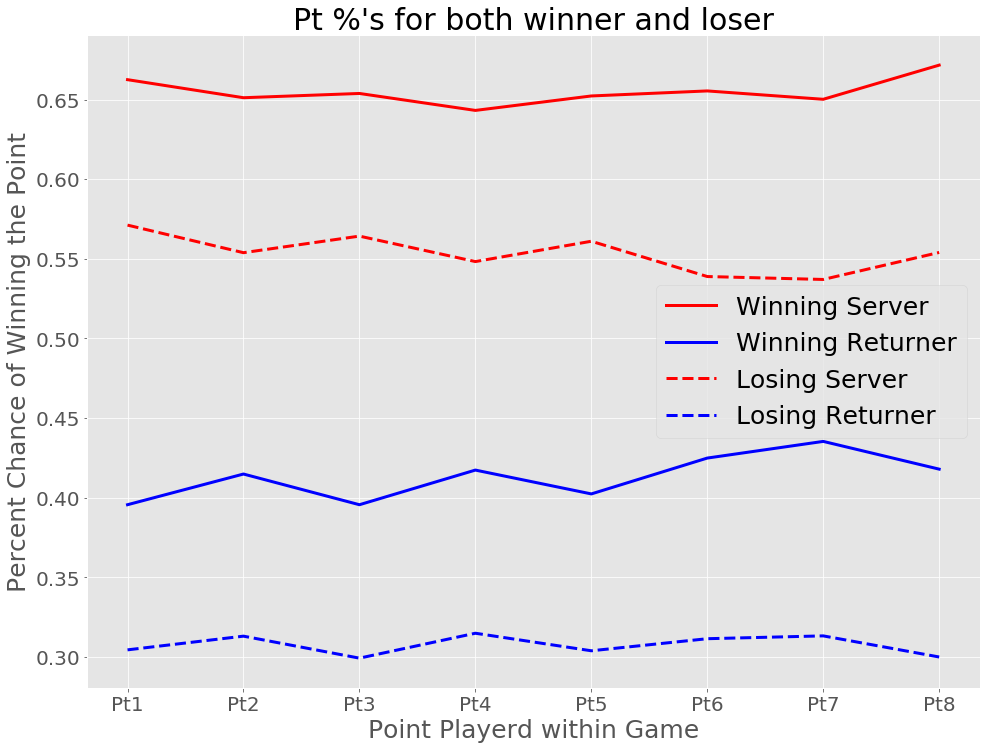

In [247]:
#fig = plt.figure(figsize=(12,8))
fig, ax = plt.subplots(1,1, figsize =(16,12))
ax.plot(s_win, c="r", linewidth=3.0,label="Winning Server")
ax.plot(r_win, c="b", linewidth=3.0, label ="Winning Returner")
ax.plot(s_lose, c="r", linewidth=3.0, linestyle='dashed', label = "Losing Server")
ax.plot(r_lose, c="b", linewidth=3.0, linestyle='dashed',label ="Losing Returner")
plt.title("Pt %'s for both winner and loser",fontsize=30)
ax.set_xlabel("Point Playerd within Game",fontsize=25)
ax.set_ylabel("Percent Chance of Winning the Point",fontsize=25)
plt.tick_params(labelsize=20)
plt.legend(prop={'size':25})
plt.savefig("images/WinnerLoserPts.png")
plt.show()

In [150]:
df_new = df[df["server1"]=="Roger Federer"]
df_roger =df_new[df_new["winner"]==1]
df_roger

,date,tny_name,tour,draw,server1,server2,winner,score,adf_flag,tny_date,...,Set1,Set2,Set3,Set4,Set5,TB1,TB2,TB3,TB4,TB5
92,10 Aug 11,RogersCup-ATPMontreal2011,ATP,Main,Roger Federer,Vasek Pospisil,1,7-5 6-3,0,15196.0,...,SSSS;SSSRRS;SSSRRS;SSSRRS;SSSS;RSSSS;SSSRS;RRS...,SSSS;SSSRRRRR;SSSS;SSRSS;RSSSS;SSRSS;SSSS;SSSR...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118,17 Aug 11,Western&amp;SouthernOpen-ATPCincinnati2011,ATP,Main,Roger Federer,Juan Martin del Potro,1,6-3 7-5,0,15203.0,...,RSRSSS;RSSSRS;RSRSSS;SRRSSRSRSRSRRR;SSSS;RSSRS...,RRRSSSRSRSSS;SSSRS;SSRRSS;SRSSRS;SSSRRS;SSRRRS...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,17 Aug 11,Western&amp;SouthernOpen-ATPCincinnati2011.html,ATP,Main,Roger Federer,Juan Martin del Potro,1,6-3 7-5,0,15203.0,...,RSRSSS;RSSSRS;RSRSSS;SRRSSRSRSRSRRR;SSSS;RSSRS...,RRRSSSRSRSSS;SSSRS;SSRRSS;SRSSRS;SSSRRS;SSRRRS...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130,17 Aug 11,Western&amp;SouthernOpen-ATPCincinnati2011.html,ATP,Main,Roger Federer,Juan Martin del Potro,1,6-3 7-5,0,15203.0,...,RSRSSS;RSSSRS;RSRSSS;SRRSSRSRSRSRRR;SSSS;RSSRS...,RRRSSSRSRSSS;SSSRS;SSRRSS;SRSSRS;SSSRRS;SSRRRS...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181,30 Aug 11,Men'sUSOpen,ATP,Main,Roger Federer,Santiago Giraldo,1,6-4 6-3 6-2,0,15216.0,...,SSSS;RSSSRS;SSRSRS;RRRSSSRR;SSSRS;SSSRRRRSRR;S...,SSRRSS;RSSRRSRR;SRSRSS;SRRSSRRSSRRSSS;RSSRRR;S...,RSRSRR;RRSSSS;RRSRR;SSRSRS;RRSSSRRSSS;SRRSSS;R...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,30 Aug 11,Men'sUSOpen.html,ATP,Main,Roger Federer,Santiago Giraldo,1,6-4 6-3 6-2,0,15216.0,...,SSSS;RSSSRS;SSRSRS;RRRSSSRR;SSSRS;SSSRRRRSRR;S...,SSRRSS;RSSRRSRR;SRSRSS;SRRSSRRSSRRSSS;RSSRRR;S...,RSRSRR;RRSSSS;RRSRR;SSRSRS;RRSSSRRSSS;SRRSSS;R...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,01 Sep 11,Men'sUSOpen.html,ATP,Main,Roger Federer,Dudi Sela,1,6-3 6-2 6-2,0,15218.0,...,SSSS;SSSS;SSSS;SRSRSS;SRSSS;SRRRSR;SSRRSS;SRSS...,SSSS;SSSS;RSRRSSSS;SSSS;RRRSSR;SSSS;RSRSRR;SRSRSS,SSSS;SSSS;RSSSRRRR;SSSS;SRRSSS;SSRSS;RRRSR;SSRSRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195,03 Sep 11,Men'sUSOpen.html,ATP,Main,Roger Federer,Marin Cilic,1,6-3 4-6 6-4 6-2,0,15220.0,...,SSSS;SSRSRS;RRRSSSSRSS;RSRRSR;SSSRS;RSSRSS;SSS...,RSRSSS;SSSS;SSSS;RRSSRSSS;SSSRS;SSRSS;SRSSS;SS...,RSSRRSSRRR;RRRR;SRRSRSSS;SSRRRSSS;RSRSSS;SSRSS...,SRSSRS;RSRSSS;RSRRSSRR;SSSS;SSSS;SRRSRSSS;SRSR...,NaN,NaN,NaN,NaN,NaN,NaN
199,06 Sep 11,Men'sUSOpen.html,ATP,Main,Roger Federer,Juan Monaco,1,6-1 6-2 6-0,0,15223.0,...,SSRRSS;RRRSSR;SSSS;RSRRR;SSSS;SRSRSS;SSSS,SRRSSRSRRR;SSSS;SRSSS;SRSSS;RSSRSRSRRSRSSS;SSS...,RRRR;RSSRSS;RRSRSR;RRSSSS;RRSRSR;RSSRSRSRSS,NaN,NaN,NaN,NaN,NaN,NaN,NaN
205,30 Aug 11,Men'sUSOpen.html,ATP,Main,Roger Federer,Santiago Giraldo,1,6-4 6-3 6-2,0,15216.0,...,SSSS;RSSSRS;SSRSRS;RRRSSSRR;SSSRS;SSSRRRRSRR;S...,SSRRSS;RSSRRSRR;SRSRSS;SRRSSRRSSRRSSS;RSSRRR;S...,RSRSRR;RRSSSS;RRSRR;SSRSRS;RRSSSRRSSS;SRRSSS;R...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [159]:
df_roger_serve = df_roger
df_roger_serve["pt_perc"]=df_roger_serve["Set1"].apply(lambda x: get_lst_of_strings_to_decode(x)[0::2])
df_roger_serve["pt_perc_num"]= df_roger_serve["pt_perc"].apply(lambda x: point_by_sgame_perc(x))
#df_try.head()
columns =["Pt1","Pt2","Pt3","Pt4","Pt5","Pt6","Pt7","Pt8","Pt9","Pt10","Pt11","Pt12"] #,"Pt13","Pt14","Pt15","Pt16","Pt17","Pt18","Pt19","Pt20"]
df_roger_serve_final=pd.DataFrame(df_roger_serve.pt_perc_num.tolist(),columns=columns)
df_roger_serve_final
s_win_roger=df_roger_serve_final.mean()[0:8]
s_win_roger
df_roger_return = df_roger
df_roger_return["pt_perc"]=df_roger_return["Set1"].apply(lambda x: get_lst_of_strings_to_decode(x)[1::2])
df_roger_return["pt_perc_num"]= df_roger_return["pt_perc"].apply(lambda x: point_by_rgame_perc(x))
columns =["Pt1","Pt2","Pt3","Pt4","Pt5","Pt6","Pt7","Pt8","Pt9","Pt10","Pt11","Pt12"]#,"Pt13","Pt14","Pt15","Pt16","Pt17","Pt18"]
df_roger_return_final=pd.DataFrame(df_roger_return.pt_perc_num.tolist(),columns=columns)
df_roger_return_final
df_roger_return_final.count()
r_win_roger=df_roger_return_final.mean()[0:8]
r_win_roger

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

Pt1    0.413264
Pt2    0.388656
Pt3    0.370070
Pt4    0.419983
Pt5    0.414211
Pt6    0.389871
Pt7    0.400735
Pt8    0.458946
dtype: float64

<Figure size 864x576 with 0 Axes>

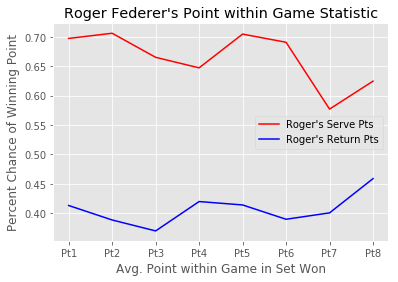

In [152]:
#fig = plt.figure(figsize=(12,8))
#fig, ax = plt.subplots(1,1)
#ax.plot(s_win_roger, c="r", label="Roger's Serve Pts")
#ax.plot(r_win_roger, c="b", label ="Roger's Return Pts")
#plt.title("Roger Federer's Point within Game Statistic")
#plt.legend()
#plt.xlabel("Avg. Point within Game in Set Won")
#plt.ylabel("Percent Chance of Winning Point")
#plt.savefig("images/Roger.png")
#plt.show()

In [153]:
df_new2 = df[df["server1"]=="Rafael Nadal"]
df_rafa =df_new2[df_new2["winner"]==1]
df_rafa

,date,tny_name,tour,draw,server1,server2,winner,score,adf_flag,tny_date,...,Set1,Set2,Set3,Set4,Set5,TB1,TB2,TB3,TB4,TB5
197,04 Sep 11,Men'sUSOpen.html,ATP,Main,Rafael Nadal,David Nalbandian,1,7-6(5) 6-1 7-5,0,15221.0,...,SSSS;RRSSSS;SSSS;RSSSRS;RRSSRR;SSRRSS;RSRSSRSS...,RSRRR;SRRSSS;RRRR;SSRSS;SRSSRS;RSSSS;RRSRR,RSRSRSRR;RRRSR;SSRSRRRSSRSS;RSSSS;SSSS;RSRRSR;...,NaN,NaN,S/SR/RS/SR/SR/SR/S,NaN,NaN,NaN,NaN
213,04 Sep 11,Men'sUSOpen.html,ATP,Main,Rafael Nadal,David Nalbandian,1,7-6(5) 6-1 7-5,0,15221.0,...,SSSS;RRSSSS;SSSS;RSSSRS;RRSSRR;SSRRSS;RSRSSRSS...,RSRRR;SRRSSS;RRRR;SSRSS;SRSSRS;RSSSS;RRSRR,RSRSRSRR;RRRSR;SSRSRRRSSRSS;RSSSS;SSSS;RSRRSR;...,NaN,NaN,S/SR/RS/SR/SR/SR/S,NaN,NaN,NaN,NaN
229,04 Sep 11,Men'sUSOpen.html,ATP,Main,Rafael Nadal,David Nalbandian,1,7-6(5) 6-1 7-5,0,15221.0,...,SSSS;RRSSSS;SSSS;RSSSRS;RRSSRR;SSRRSS;RSRSSRSS...,RSRRR;SRRSSS;RRRR;SSRSS;SRSSRS;RSSSS;RRSRR,RSRSRSRR;RRRSR;SSRSRRRSSRSS;RSSSS;SSSS;RSRRSR;...,NaN,NaN,S/SR/RS/SR/SR/SR/S,NaN,NaN,NaN,NaN
385,06 Oct 11,RakutenJapanOpen-ATPTokyo2011,ATP,Main,Rafael Nadal,Milos Raonic,1,7-5 6-3,0,15253.0,...,SSRSS;SSSS;SSRRSS;SSSS;SSSS;SSSRRS;SSSS;SRRSSS...,SRSSS;SSSS;SRSSRRSS;RRSSSS;SSSS;SRRRR;SRRSSS;S...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
475,12 Oct 11,ShanghaiRolexMasters-ATPShanghai2011,ATP,Main,Rafael Nadal,Guillermo Garcia-Lopez,1,6-3 6-2,0,15259.0,...,RSRSSS;SRSRRSRSSRSRRSSRSS;SSSS;RSRSRSSRSRRR;SR...,RSSSRRSRSS;SSSS;RRSRR;RSRRR;RRRSSR;SSRRSS;SRRR...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
750,03 Jan 12,QatarExxonMobilOpen-ATPQatar20111,ATP,Main,Rafael Nadal,Philipp Kohlschreiber,1,6-3 6-7(2) 6-3,0,15342.0,...,SSSS;SSSS;SRSSRS;RRRSSR;SSSS;SSSRS;SSSRRS;SRSR...,RSRSSS;RRSRSR;SSRRSS;RSSSRRSS;RSSRSRSS;SRSSS;S...,RSSRRR;RRRSSR;RSSSS;SRRSRR;SRSSS;SSSRS;SSSS;SR...,NaN,NaN,NaN,S/RR/RS/RR/RS,NaN,NaN,NaN
1101,11 Mar 12,BNPParibasOpen-ATPIndianWells2012,ATP,Main,Rafael Nadal,Leonardo Mayer,1,6-1 6-3,0,15410.0,...,SRSSS;RSSRRR;SSSRS;RRRR;SSSS;SRSSS;SSSRS,SRSRSS;SSSS;RRRR;SRSSS;RSRRSSSS;SSSS;RSSRSRSRS...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1121,13 Mar 12,BNPParibasOpen-ATPIndianWells2012.html,ATP,Main,Rafael Nadal,Marcel Granollers,1,6-1 6-4,0,15412.0,...,SRRSSS;RSSRRR;SSSS;SSSS;SSSRRS;SRRSSRRR;SSSS,SRRSRR;SSSS;SRSRSS;SSSRS;SSSS;RRSRSSSRSS;SRSSS...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1127,14 Mar 12,BNPParibasOpen-ATPIndianWells2012.html,ATP,Main,Rafael Nadal,Alexandr Dolgopolov,1,6-3 6-2,0,15413.0,...,SSRRSS;SRRRSR;SSSS;RSRSSS;SSSRRS;SRSRRSSRSS;SS...,RSSSS;RRSSSS;SRRRR;SSSS;RRRSR;SSSS;RRSSSRSS;SR...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1176,24 Mar 12,SonyEricssonOpen-ATPMiami,ATP,Main,Rafael Nadal,Santiago Giraldo,1,6-2 6-0,0,15423.0,...,RSRSSS;SSRSS;SSSS;SSRSRS;RRSSSS;RSRRR;SSSS;SRR...,RSSSRS;SRRSSRRR;SSRRSS;RRRR;SRRSRSSS;RSRSRR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [160]:
df_rafa_serve = df_rafa
df_rafa_serve["pt_perc"]=df_rafa_serve["Set1"].apply(lambda x: get_lst_of_strings_to_decode(x)[0::2])
df_rafa_serve["pt_perc_num"]= df_rafa_serve["pt_perc"].apply(lambda x: point_by_sgame_perc(x))
#df_try.head()
columns =["Pt1","Pt2","Pt3","Pt4","Pt5","Pt6","Pt7","Pt8","Pt9","Pt10","Pt11","Pt12"] #,"Pt13","Pt14","Pt15","Pt16","Pt17","Pt18","Pt19","Pt20"]
df_rafa_serve_final=pd.DataFrame(df_rafa_serve.pt_perc_num.tolist(),columns=columns)
df_rafa_serve_final
s_win_rafa=df_rafa_serve_final.mean()[0:8]
s_win_rafa
df_rafa_return = df_rafa
df_rafa_return["pt_perc"]=df_rafa_return["Set1"].apply(lambda x: get_lst_of_strings_to_decode(x)[1::2])
df_rafa_return["pt_perc_num"]= df_rafa_return["pt_perc"].apply(lambda x: point_by_rgame_perc(x))
columns =["Pt1","Pt2","Pt3","Pt4","Pt5","Pt6","Pt7","Pt8","Pt9","Pt10","Pt11","Pt12"]#,"Pt13","Pt14","Pt15","Pt16","Pt17","Pt18"]
df_rafa_return_final=pd.DataFrame(df_rafa_return.pt_perc_num.tolist(),columns=columns)
df_rafa_return_final
df_rafa_return_final.count()
r_win_rafa=df_rafa_return_final.mean()[0:8]
r_win_rafa

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

Pt1    0.371389
Pt2    0.408194
Pt3    0.442222
Pt4    0.405556
Pt5    0.403333
Pt6    0.391525
Pt7    0.412658
Pt8    0.387342
dtype: float64

<Figure size 864x576 with 0 Axes>

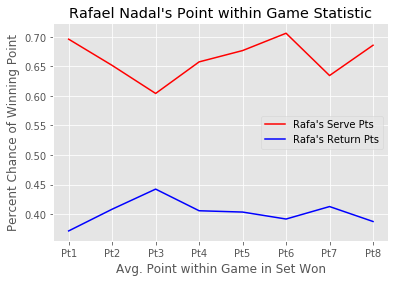

In [155]:
#fig = plt.figure(figsize=(12,8))
#fig, ax = plt.subplots(1,1)
#ax.plot(s_win_rafa, c="r", label="Rafa's Serve Pts")
#ax.plot(r_win_rafa, c="b", label ="Rafa's Return Pts")
#plt.title("Rafael Nadal's Point within Game Statistic")
#plt.xlabel("Avg. Point within Game in Set Won")
#plt.ylabel("Percent Chance of Winning Point")
#plt.legend()
#plt.savefig("images/Rafa.png")
#plt.show()

In [156]:
df_new3 = df[df["server1"]=="Denis Istomin"]
df_denis =df_new3[df_new3["winner"]==1]
df_denis

,date,tny_name,tour,draw,server1,server2,winner,score,adf_flag,tny_date,...,Set1,Set2,Set3,Set4,Set5,TB1,TB2,TB3,TB4,TB5
675,09 Jan 12,ApiaInternational-ATPSydney2011,ATP,Main,Denis Istomin,Pablo Andujar,1,6-3 2-6 6-3,0,15348.0,...,SSRRRSSS;RRRR;SSSS;SRRSRSSS;SSSS;RRSSSRSS;SSSS...,RSSRSRRSSS;SSSS;SRSSS;RSSSRS;RSSRSS;SSRRRSRSSR...,SSSS;SSRSS;RRSSRSSS;SRSSRS;SRRSSRRSRR;SSSS;SSR...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
683,11 Jan 12,ApiaInternational-ATPSydney2011,ATP,Main,Denis Istomin,Ryan Sweeting,1,6-2 6-1,0,15350.0,...,RRSSRSSS;SRSSRS;RSSSS;SRSSRRRR;SSSS;SRSSS;SSSS...,RSSSS;SRSSS;SRSSS;RSRSRR;RSSSRS;RRRSSR;SRSRSRSS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
968,15 Feb 12,SAPOpen-ATPSanJose,ATP,Main,Denis Istomin,Sam Querrey,1,5-7 6-3 7-5,0,15385.0,...,SRRSRSSRSRSS;RSSSS;RRRSSSRSSS;RRSRSR;SRRRSSRR;...,SRRSRSRSSRSS;SSSS;RSRSSS;SSSS;SRRSSRSS;RSSRRSR...,SSSS;SRSSS;SSRRSS;SSRSS;SSSS;SSSS;SRSSS;SSSS;R...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
978,17 Feb 12,SAPOpen-ATPSanJose,ATP,Main,Denis Istomin,Michael Russell,1,6-2 6-2,0,15387.0,...,SSSRRS;SSRSS;SSSRS;RRSRR;SSRSS;SRRSSS;SSRSS;RRRSR,SSRRSS;RRRSSR;SSRSRRSS;SRRRR;SRSSS;RSSSS;RRRR;...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
983,19 Feb 12,SAPOpen-ATPSanJose,ATP,Main,Denis Istomin,Julien Benneteau,1,6-3 6-7(4) 6-3,0,15389.0,...,SSRSS;RSRSSS;RSRSSRRSSS;SSSS;SSSS;SRRRR;SSSRS;...,SRSSS;SRSSS;SRRSSS;RSSSS;SRRSSRRSRSSS;RSRSSRRR...,RSRSSRSS;SSSS;SRSRSS;SRSRSS;RSSSS;SRSSS;SSSS;S...,NaN,NaN,NaN,R/RR/RS/SR/SS/SR,NaN,NaN,NaN
1024,27 Feb 12,DelrayBeachInternationalTennisChampionships-AT...,ATP,Main,Denis Istomin,Matthew Ebden,1,6-2 6-3,0,15397.0,...,SSSRRS;RRSRSSSRSS;SSSRRRRSSS;SSRRRR;RRSRSSRSSS...,SSSS;RSSRSS;SSSS;RSRSSS;SSSS;SSRSRS;RRSRSSSS;S...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1095,11 Mar 12,BNPParibasOpen-ATPIndianWells2012,ATP,Main,Denis Istomin,Juan Ignacio Chela,1,7-6(5) 6-7(7) 7-5,0,15410.0,...,RRSRSSSS;SSRRRSSRSRRR;RSSRRSSS;SRSRRSRSRR;RRRR...,RRRSR;RRRR;RRSSRSSRSRRSRSSS;SRRSSS;RSRSSS;SRSS...,SSSRS;SSSS;RRSSSS;SSSRRS;SRRSRSRR;SSSRRRSRSRRS...,NaN,NaN,S/SR/RR/RS/SS/RS/S,R/RS/SS/SR/RR/SR/SR/RR/S,NaN,NaN,NaN
1417,30 Apr 12,EstorilOpen-ATPEstoril,ATP,Main,Denis Istomin,Paul-Henri Mathieu,1,7-5 6-1,0,15460.0,...,SRSRSS;SSSS;SSRSRRSRSS;RSSRSS;SSSS;RSRSRSRSRR;...,SRSSRS;RRSRR;RSSSS;SSRRSS;SSSS;SRRRSR;SSSS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1611,29 May 12,MensFrenchOpen.html,ATP,Main,Denis Istomin,Igor Kunitsyn,1,6-2 6-1 6-2,0,15489.0,...,SRRRSR;RSSRRR;RSSRSS;SSRRRR;SSSS;RSRSSRSRSS;SR...,RSSSS;RSSRRSRR;SSSS;SRSSS;SSSRS;RSRSRR;SSRRSS,SRRSRR;SSRRSS;RSRSSS;SSSS;SRRSSRSRSRSS;RSSSS;R...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1656,22 May 12,OpendeNiceCotedAzur-ATPNice,ATP,Main,Denis Istomin,Alejandro Falla,1,7-6(3) 1-6 6-1,0,15482.0,...,RSRSSS;SRSSS;SSSRRS;SSSS;SSSS;RSSSRRSRSS;SRSRR...,SSRSRS;RSRSSS;SSRSRS;RRRR;SRSSRS;RRRSSR;SSRSS,SSSRRRSS;SRRRSR;SRSSRRSS;SSRSRS;SRSRRSSRSS;RSR...,NaN,NaN,R/RS/SS/SR/SS/R,NaN,NaN,NaN,NaN


In [161]:
df_denis_serve = df_denis
df_denis_serve["pt_perc"]=df_denis_serve["Set1"].apply(lambda x: get_lst_of_strings_to_decode(x)[0::2])
df_denis_serve["pt_perc_num"]= df_denis_serve["pt_perc"].apply(lambda x: point_by_sgame_perc(x))
#df_try.head()
columns =["Pt1","Pt2","Pt3","Pt4","Pt5","Pt6","Pt7","Pt8","Pt9","Pt10","Pt11","Pt12"] #,"Pt13","Pt14","Pt15","Pt16","Pt17","Pt18","Pt19","Pt20"]
df_denis_serve_final=pd.DataFrame(df_denis_serve.pt_perc_num.tolist(),columns=columns)
df_denis_serve_final
s_win_denis=df_denis_serve_final.mean()[0:8]
s_win_denis
df_denis_return = df_denis
df_denis_return["pt_perc"]=df_denis_return["Set1"].apply(lambda x: get_lst_of_strings_to_decode(x)[1::2])
df_denis_return["pt_perc_num"]= df_denis_return["pt_perc"].apply(lambda x: point_by_rgame_perc(x))
columns =["Pt1","Pt2","Pt3","Pt4","Pt5","Pt6","Pt7","Pt8","Pt9","Pt10","Pt11","Pt12"]#,"Pt13","Pt14","Pt15","Pt16","Pt17","Pt18"]
df_denis_return_final=pd.DataFrame(df_denis_return.pt_perc_num.tolist(),columns=columns)
df_denis_return_final
df_denis_return_final.count()
r_win_denis=df_denis_return_final.mean()[0:8]
r_win_denis

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

Pt1    0.388889
Pt2    0.365771
Pt3    0.340323
Pt4    0.376703
Pt5    0.379032
Pt6    0.389606
Pt7    0.442641
Pt8    0.391775
dtype: float64

<Figure size 864x576 with 0 Axes>

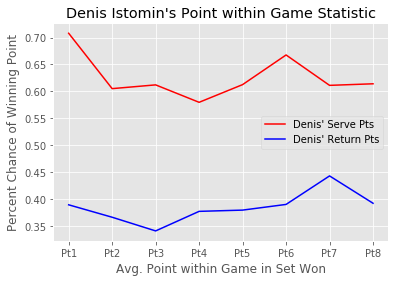

In [158]:
#fig = plt.figure(figsize=(12,8))
#fig, ax = plt.subplots(1,1)
#ax.plot(s_win_denis, c="r", label="Denis' Serve Pts")
#ax.plot(r_win_denis, c="b", label ="Denis' Return Pts")
#plt.title("Denis Istomin's Point within Game Statistic")
#plt.xlabel("Avg. Point within Game in Set Won")
#plt.ylabel("Percent Chance of Winning Point")
#plt.legend()
#plt.savefig("images/Denis.png")
#plt.show()

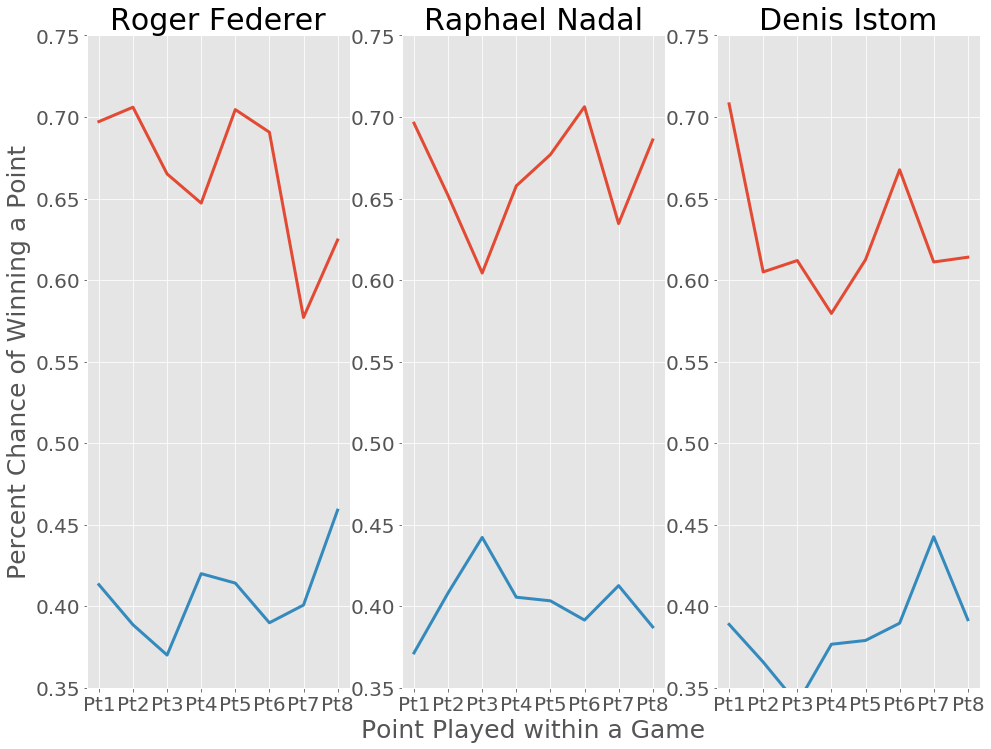

In [248]:
fig, ax = plt.subplots(1,3,figsize =(16,12))
ax[0].plot(s_win_roger, linewidth=3.0)
ax[0].plot(r_win_roger, linewidth=3.0)
ax[0].set_title("Roger Federer", fontsize=30)
ax[1].plot(s_win_rafa,linewidth=3.0)
ax[1].plot(r_win_rafa, linewidth=3.0)
ax[1].set_title("Raphael Nadal",fontsize=30)
ax[2].plot(s_win_denis,linewidth=3.0)
ax[2].plot(r_win_denis,linewidth=3.0)
ax[2].set_title("Denis Istom",fontsize=30)
ax[0].set_ylim([0.35,0.75])
ax[1].set_ylim([0.35,0.75])
ax[2].set_ylim([0.35,0.75])  
ax[0].set_ylabel("Percent Chance of Winning a Point", fontsize=25)
ax[1].set_xlabel("Point Played within a Game", fontsize=25)
ax[0].tick_params(labelsize=20)
ax[1].tick_params(labelsize=20)
ax[2].tick_params(labelsize=20)
plt.savefig("images/Comparison.png")
plt.show()